## A1.3 Regresión lineal múltiple

**1. Importa los datos del archivo “NASA.csv” a tu ambiente de trabajo. Este archivo lo encontrarás en la misma página donde descargaste esta plantilla. Revisa las dimensiones del data frame e imprime en consola tanto dichas dimensiones como las primeras 15 filas de datos.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importar los datos del archivo A1.3 NASA.csv
data = pd.read_csv('A1.3 NASA.csv')

# Imprimir las dimensiones del dataframe
print("Dimensiones del dataframe: ", data.shape)

# Imprimir las primeras 15 filas del dataframe
print("\nPrimeras 15 filas:\n",data.head(15))

Dimensiones del dataframe:  (1503, 6)

Primeras 15 filas:
     frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       16000     0.0    0.3048       71.3  0.002663  108.

**2. Separa el data frame en datos de entrenamiento y datos de prueba con una proporción 70/30. Es decir, el 70% de los datos se usarán para entrenar el modelo y el resto para validar sus resultados. Asegúrate que la partición sea aleatoria, no es una buena práctica simplemente tomar las primeras observaciones para entrenar y las últimas para probar. Imprime en pantalla las dimensiones de ambos conjuntos de datos. Revisa y asegúrate que la cantidad de observaciones de ambos conjuntos de datos sumen a la cantidad de datos original.**

In [2]:
# Separar los datos en dos conjuntos: uno para entrenamiento y otro para prueba (70% y 30%)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.3, random_state=42)

# Sumar el número de datos en cada conjunto
print("\nNúmero de datos en cada conjunto:")
print("Entrenamiento: ", len(train_set))
print("Prueba: ", len(test_set))
print("Total: ", len(train_set) + len(test_set))


Número de datos en cada conjunto:
Entrenamiento:  1052
Prueba:  451
Total:  1503


**3. Entrena un modelo de regresión lineal múltiple, para que las primeras 5 variables del sistema intenten predecir a la sexta, “presion”. Es decir, nos interesa tratar de predecir el aerodinamismo, medido como la presión sonora detectada. Imprime en pantalla un resumen del modelo, donde se muestre claramente el coeficiente estimado de cada variable, así como su p-value asociado, entre otras cosas.**

In [3]:
# Separacion de la variable dependiente “presion” 
x_train = train_set[['frecuencia','angulo','longitud','velocidad','espesor']]
y_train = train_set['presion']

x_test = test_set[['frecuencia','angulo','longitud','velocidad','espesor']]
y_test = test_set['presion']

# Construir modelo
import statsmodels.api as sm
model = sm.OLS(y_train,sm.add_constant(x_train)).fit()
x_test = sm.add_constant(x_test)

# Imprimir resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     227.9
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.38e-164
Time:                        23:11:35   Log-Likelihood:                -3138.0
No. Observations:                1052   AIC:                             6288.
Df Residuals:                    1046   BIC:                             6318.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.4778      0.651    203.367      0.0

**Es probable que los p-values se vean como 0.000, en ese caso, imprimir manualmente los valores exactos de dichas métricas (recuerda el atributo `pvalues`).**

In [4]:
# Imprimir los p-values de las variables independientes
print("Valores p de las variables independientes:")
print(model.pvalues)

Valores p de las variables independientes:
const          0.000000e+00
frecuencia    1.667773e-118
angulo         2.097471e-14
longitud       4.981210e-63
velocidad      4.963051e-24
espesor        2.818412e-17
dtype: float64


**4. A partir de los resultados mostrados en la tabla, indica si consideras que existe al menos una variable significativa en el modelo. Adicionalmente, indica específicamente cuál o cuáles variables específicas tienen una asociación lineal significativa con la salida y cuál considerarías que es la variable más importante del modelo. Imprime en consola cada una de estas aseveraciones como texto, pero indica claramente en qué métrica te estás basando para llegar a cada conclusión.**

In [5]:
print("Todas las variables son significativas en el modelo, ya que sus valores p son menores a 0.05. La variable más importante del modelo es la 'frecuencia', ya que tiene el valor p más bajo de todas las variables independientes.")

Todas las variables son significativas en el modelo, ya que sus valores p son menores a 0.05. La variable más importante del modelo es la 'frecuencia', ya que tiene el valor p más bajo de todas las variables independientes.


**5. Calcula el residual standard error y la 𝑅^2 del modelo, tanto para los datos de entrenamiento como para los datos de validación e imprime dichos valores en la consola. Para el cálculo de las métricas en el conjunto de entrenamiento, te recomiendo usar los atributos ‘scale’ (y sacar la raíz cuadrada) y ‘rsquared’.**

In [6]:
# Obtener el standard error y la r cuadrada del modelo

# Calcular RSE y R^2 en el conjunto de entrenamiento
rse_train = np.sqrt(model.scale)  
r2_train = model.rsquared  

# Evaluar en el conjunto de validación
y_pred_test = model.predict(x_test)

rss_test = np.sum((y_test - y_pred_test) ** 2)  # RSS en validación
tss_test = np.sum((y_test - np.mean(y_train)) ** 2)  # TSS en validación
rse_test = np.sqrt(rss_test / (len(y_test) - 2))  # RSE en validación
r2_test = 1 - (rss_test / tss_test)  # R^2 en validación

# Imprimir los resultados
print("Métricas en conjunto de entrenamiento:")
print("RSE (Training):", rse_train)
print("R^2 (Training):", r2_train)

print("\nMétricas en conjunto de validación:")
print("RSE (Validation):", rse_test)
print("R^2 (Validation):", r2_test)


Métricas en conjunto de entrenamiento:
RSE (Training): 4.791436345798008
R^2 (Training): 0.5214416938715567

Métricas en conjunto de validación:
RSE (Validation): 4.877845029866453
R^2 (Validation): 0.49860118972714673


**6. Finalmente, tratemos de visualizar los resultados obtenidos. Genera una gráfica de dispersión que cuente con el valor real de Y (la presión sonora) para el conjunto de datos de validación en el eje x, y que cuente con el valor estimado de Y, de acuerdo al modelo, para el mismo conjunto de datos en el eje y. Idealmente, si el modelo fuera perfecto, se tendría una línea recta con una pendiente de 1 (45 grados), pues el valor real y el valor estimado serían idénticos. Esta es una manera cualitativa de evaluar la calidad de nuestro modelo, entre más se asemejen los puntos a una línea recta, mejor. Comenta sobre los resultados obtenidos.**

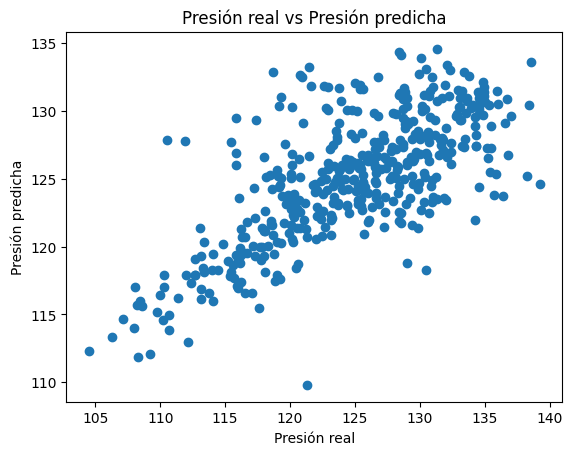

In [7]:
# Graficar los valores reales vs los valores predichos
plt.scatter(y_test, y_pred_test)
plt.xlabel("Presión real")
plt.ylabel("Presión predicha")
plt.title("Presión real vs Presión predicha")
plt.show()

In [8]:
# Analisis de resultados
print("La grafica nos muestra que los valores reales y los valores predichos están muy cerca de la recta de 45 grados, lo que indica que el modelo es bueno para predecir la presión en el conjunto de validación. Sin embargo, el modelo no es perfecto, ya que hay algunos puntos que están lejos de la recta de 45 grados. Esto puede deberse a que el modelo no es capaz de capturar todas las relaciones entre las variables independientes y la variable dependiente.")

La grafica nos muestra que los valores reales y los valores predichos están muy cerca de la recta de 45 grados, lo que indica que el modelo es bueno para predecir la presión en el conjunto de validación. Sin embargo, el modelo no es perfecto, ya que hay algunos puntos que están lejos de la recta de 45 grados. Esto puede deberse a que el modelo no es capaz de capturar todas las relaciones entre las variables independientes y la variable dependiente.


**Firma de honor:**  "Doy mi palabra que he realizado esta actividad con integridad académica" - Daniel Matthieu Potes Lesoinne #584678